In [1]:
import pandas as pd
import torch

In [2]:
dataset = pd.read_csv('data/dataset_topics.csv')
dataset

,text,labels,id,author,subreddit,created_utc,cluster,topic
0,My favourite food is anything I didn't have to...,[27],eebbqej,Rockzilla78,KitchenConfidential,2019-01-18,1,other
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,cocaineluna,morbidquestions,2019-01-01,0,humor
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,minnesotagoat_,timberwolves,2019-01-26,2,sport
3,To make her feel threatened,[14],ed7ypvh,AlexNic1013,askwomenadvice,2019-01-04,4,love and relationship
4,Dirty Southern Wankers,[3],ed0bdzj,having_a_nap,london,2019-01-01,1,other
...,...,...,...,...,...,...,...,...
54258,Thanks. I was diagnosed with BP 1 after the ho...,[15],efeeasc,scaredyk4t,bipolar,2019-01-30,4,love and relationship
54259,Well that makes sense.,[4],ef9c7s3,LX_Emergency,ABoringDystopia,2019-01-29,3,politics
54260,Daddy issues [NAME],[27],efbiugo,your_ex_girlfriend-,SquaredCircle,2019-01-30,5,film and TV series
54261,So glad I discovered that subreddit a couple m...,[0],efbvgp9,Paladin-Arda,AskALiberal,2019-01-30,3,politics


In [3]:
list(dataset['labels'][:10])

['[27]',
 '[27]',
 '[2]',
 '[14]',
 '[3]',
 '[26]',
 '[15]',
 '[ 8 20]',
 '[0]',
 '[27]']

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


### Tokenization

In [5]:
from transformers import AutoTokenizer

/home/biso/Uni/corsi/uni_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model_name = "monologg/bert-base-cased-goemotions-original"

tokenizer = AutoTokenizer.from_pretrained(model_name)

encodings = tokenizer(
    list(dataset['text']),
    truncation=True,
    padding=True,
    return_tensors='pt'
)

In [7]:
idx = 0 

# original
print(f"\nOriginal : {dataset.iloc[idx]['text']}\n")

print("-----------------------------------------")

# token_id and mask
print(f"\nToken IDs: {encodings['input_ids'][idx][:15]}")
print(f"Attention Mask: {encodings['attention_mask'][idx][:15]}\n")

print("-----------------------------------------")

# show tokens
tokens = tokenizer.convert_ids_to_tokens(encodings['input_ids'][idx][:15])
print(f"\nTokenized: {tokens[:10]}")


Original : My favourite food is anything I didn't have to cook myself.

-----------------------------------------

Token IDs: tensor([ 101, 1422, 9122, 2094, 1110, 1625,  146, 1238,  112,  189, 1138, 1106,
        9834, 1991,  119])
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

-----------------------------------------

Tokenized: ['[CLS]', 'My', 'favourite', 'food', 'is', 'anything', 'I', 'didn', "'", 't']


### Model

In [8]:
from transformers import AutoModelForSequenceClassification
import json
import numpy as np

In [9]:
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [10]:
print(json.dumps(model.config.to_dict(), indent=4))

{
    "return_dict": true,
    "output_hidden_states": false,
    "output_attentions": false,
    "torchscript": false,
    "torch_dtype": "float32",
    "use_bfloat16": false,
    "tf_legacy_loss": false,
    "pruned_heads": {},
    "tie_word_embeddings": true,
    "chunk_size_feed_forward": 0,
    "is_encoder_decoder": false,
    "is_decoder": false,
    "cross_attention_hidden_size": null,
    "add_cross_attention": false,
    "tie_encoder_decoder": false,
    "max_length": 20,
    "min_length": 0,
    "do_sample": false,
    "early_stopping": false,
    "num_beams": 1,
    "num_beam_groups": 1,
    "diversity_penalty": 0.0,
    "temperature": 1.0,
    "top_k": 50,
    "top_p": 1.0,
    "typical_p": 1.0,
    "repetition_penalty": 1.0,
    "length_penalty": 1.0,
    "no_repeat_ngram_size": 0,
    "encoder_no_repeat_ngram_size": 0,
    "bad_words_ids": null,
    "num_return_sequences": 1,
    "output_scores": false,
    "return_dict_in_generate": false,
    "forced_bos_token_id": null

In [11]:
print(f"\nNumber of labels: {model.config.num_labels}\n")
print("-----------------------------------\n")
for idx in sorted(model.config.id2label.keys()):
    print(f"Index {idx} -> {model.config.id2label[idx]}")


Number of labels: 28

-----------------------------------

Index 0 -> admiration
Index 1 -> amusement
Index 2 -> anger
Index 3 -> annoyance
Index 4 -> approval
Index 5 -> caring
Index 6 -> confusion
Index 7 -> curiosity
Index 8 -> desire
Index 9 -> disappointment
Index 10 -> disapproval
Index 11 -> disgust
Index 12 -> embarrassment
Index 13 -> excitement
Index 14 -> fear
Index 15 -> gratitude
Index 16 -> grief
Index 17 -> joy
Index 18 -> love
Index 19 -> nervousness
Index 20 -> optimism
Index 21 -> pride
Index 22 -> realization
Index 23 -> relief
Index 24 -> remorse
Index 25 -> sadness
Index 26 -> surprise
Index 27 -> neutral


In [12]:
num_labels = model.config.num_labels

def parse_labels(label):
    return list(map(int, label.strip("[]").split()))

def to_binary_vectors(label_list):
    vector = np.zeros(num_labels, dtype=int)
    for i in label_list:
        vector[i] = 1
    return vector

In [13]:
dataset['labels']

0        [27]
1        [27]
2         [2]
3        [14]
4         [3]
         ... 
54258    [15]
54259     [4]
54260    [27]
54261     [0]
54262    [27]
Name: labels, Length: 54263, dtype: object

In [30]:
num_labels = model.config.num_labels

dataset['labels_list'] = dataset['labels'].apply(parse_labels)
dataset['labels_vector'] = dataset['labels_list'].apply(to_binary_vectors)
y_true = np.stack(dataset['labels_vector'].values)

In [35]:
y_true[456]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [15]:
y_true.shape

(54263, 28)

### Testing

In [18]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score

In [20]:
# -- batching --
batch_size = 64
test_dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'])
test_loader = DataLoader(test_dataset, batch_size=batch_size)

model.eval()
model.to(device)

all_probs = []
all_preds = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits 

        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).int()

        all_probs.extend(probs.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, all_preds)
precision = precision_score(y_true, all_preds, average='weighted', zero_division=0)
recall = recall_score(y_true, all_preds, average='weighted', zero_division=0)
f1 = f1_score(y_true, all_preds, average='weighted', zero_division=0)

print("\nResults:")
print(f"- Accuracy = {accuracy:.4f}")
print(f"- Precision = {precision:.4f}")
print(f"- Recall = {recall:.4f}")
print(f"- F1 score = {f1:.4f}")


Results:
- Accuracy = 0.8405
- Precision = 0.9023
- Recall = 0.8757
- F1 score = 0.8881


In [21]:
id2label = model.config.id2label
target_names = [id2label[i] for i in range(len(id2label))]

print("\nClassification report per emotion:\n")
print(classification_report(y_true, all_preds, target_names=target_names, zero_division=0))



Classification report per emotion:

                precision    recall  f1-score   support

    admiration       0.91      0.93      0.92      5122
     amusement       0.93      0.95      0.94      2895
         anger       0.90      0.86      0.88      1960
     annoyance       0.85      0.80      0.82      3093
      approval       0.86      0.83      0.84      3687
        caring       0.86      0.85      0.85      1375
     confusion       0.89      0.84      0.87      1673
     curiosity       0.88      0.88      0.88      2723
        desire       0.91      0.84      0.87       801
disappointment       0.87      0.79      0.82      1583
   disapproval       0.86      0.83      0.85      2581
       disgust       0.90      0.86      0.88      1013
 embarrassment       0.92      0.83      0.87       375
    excitement       0.85      0.82      0.83      1052
          fear       0.91      0.89      0.90       764
     gratitude       0.98      0.96      0.97      3372
         g

### Results

In [23]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

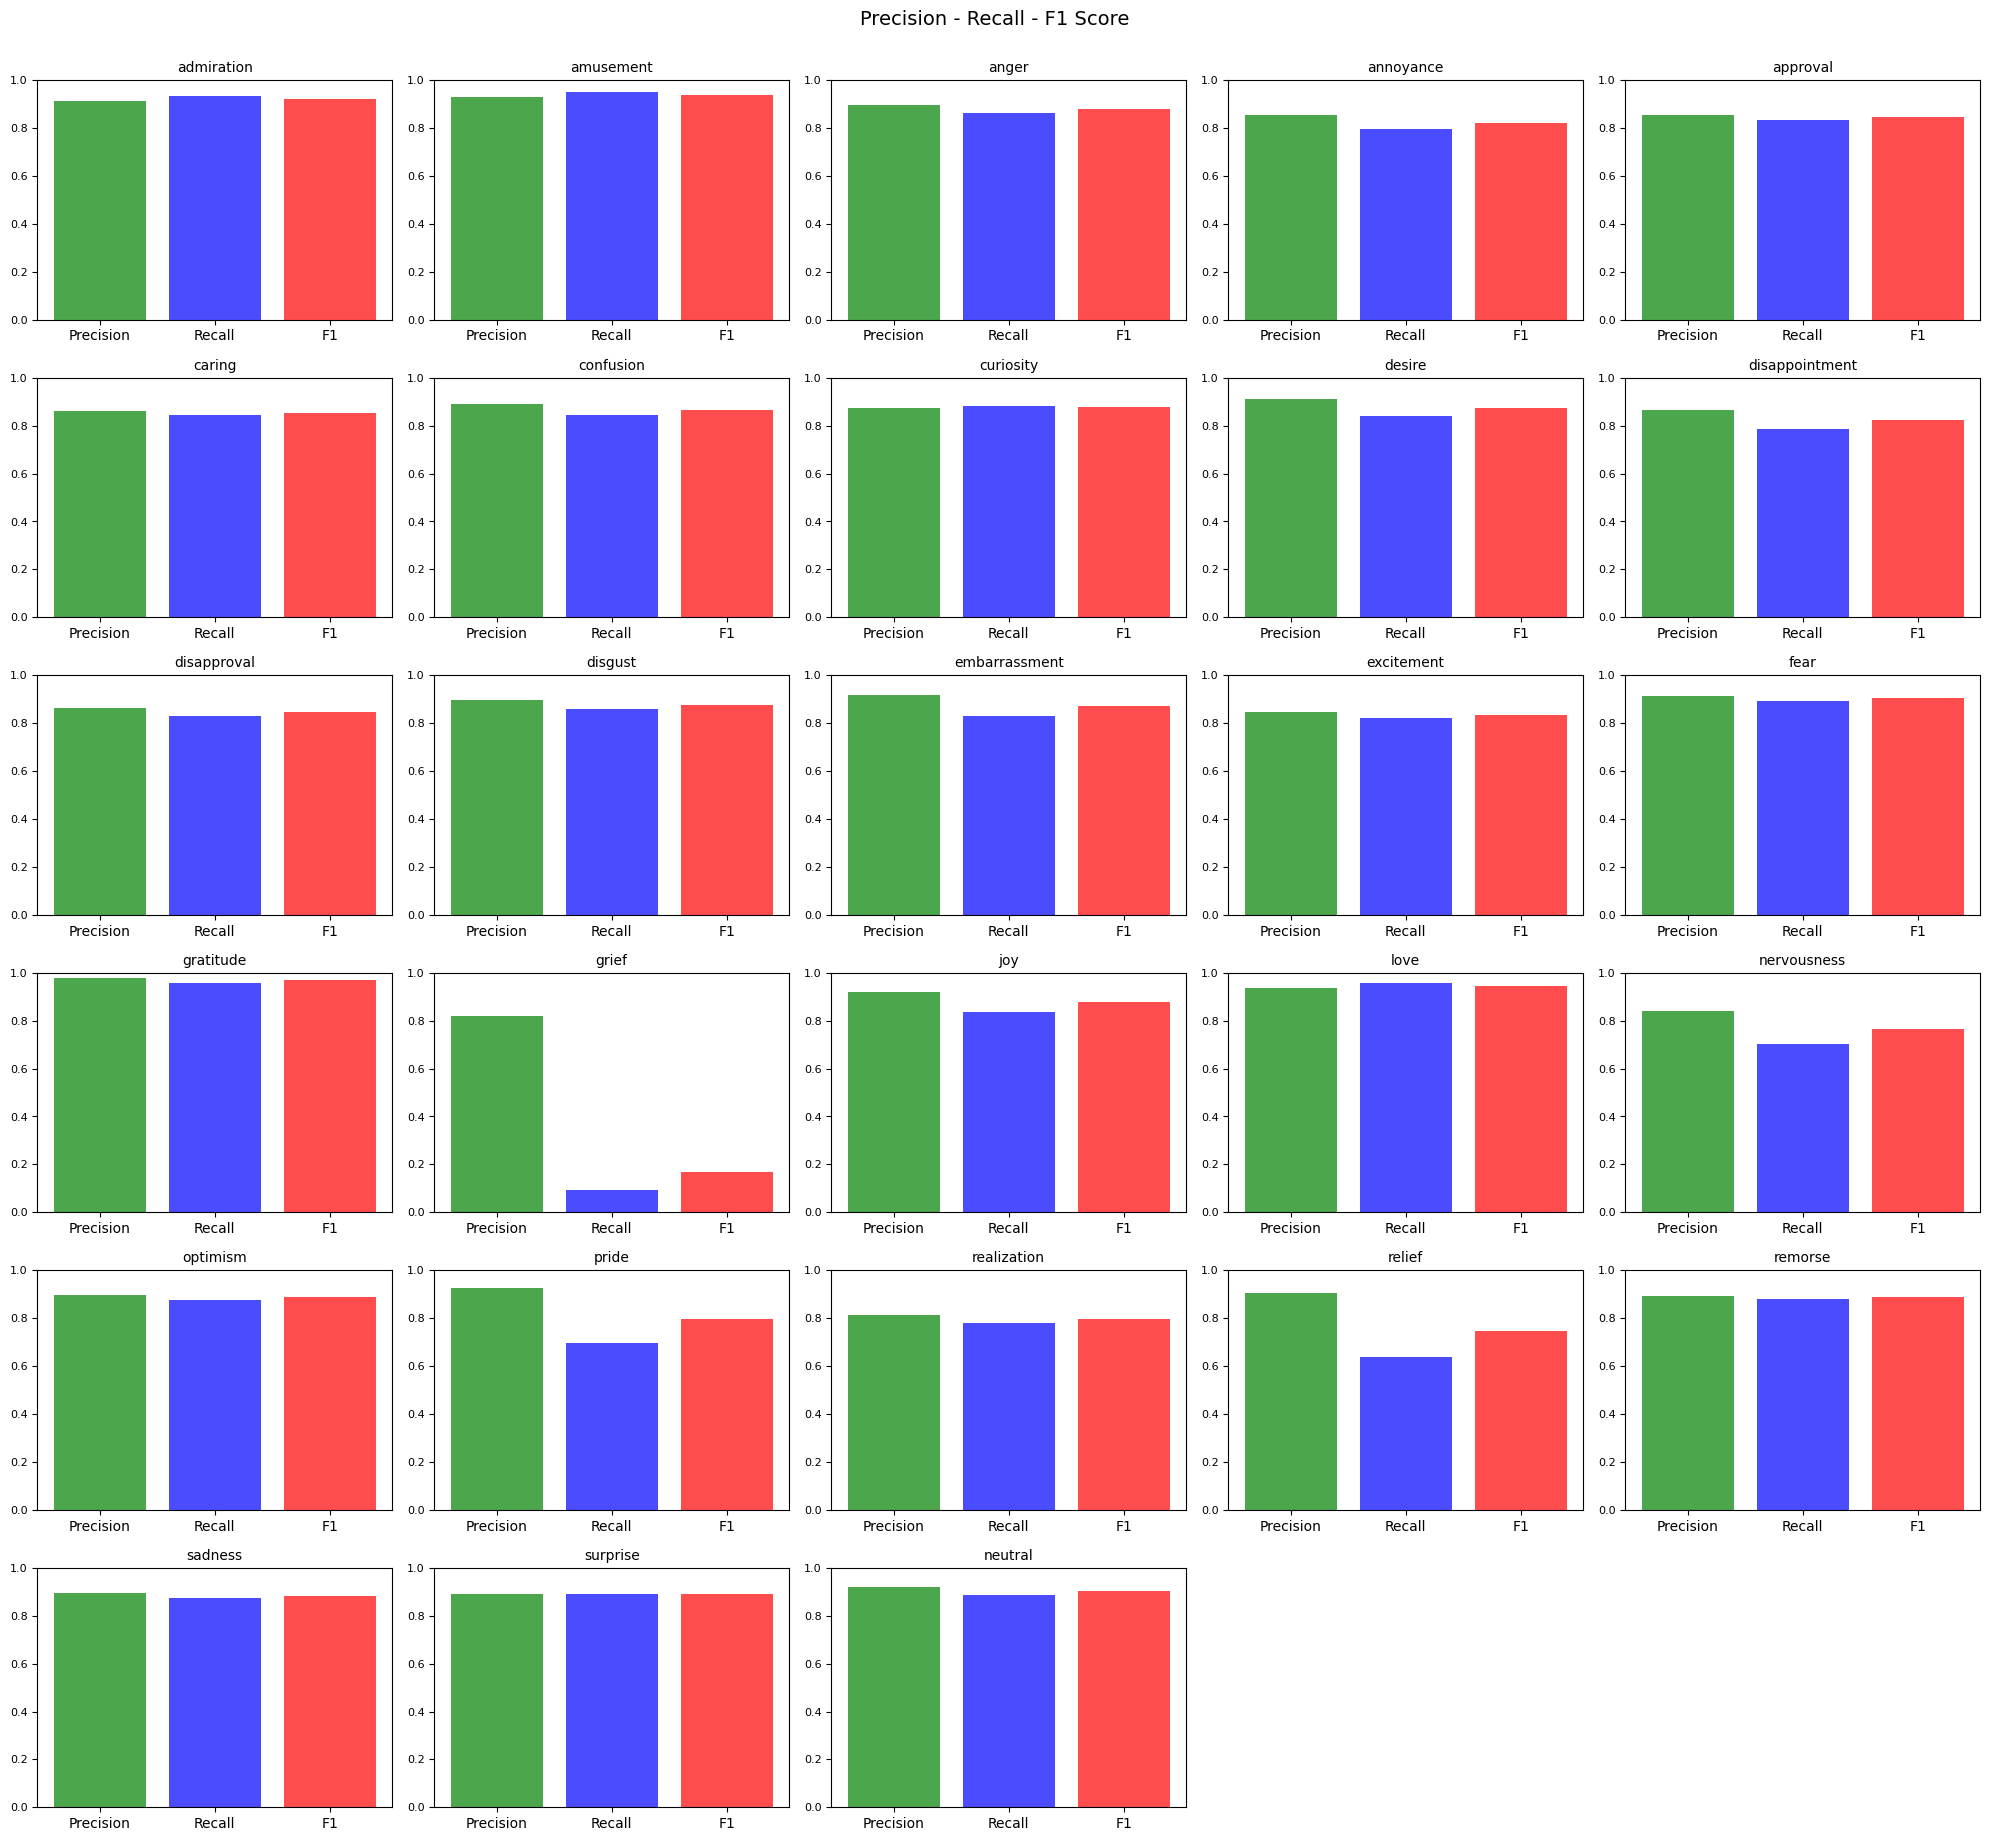

In [24]:
precisions, recalls, f1s, supports = precision_recall_fscore_support(y_true, all_preds, average=None)

labels = [model.config.id2label[i] for i in range(len(precisions))]

df_metrics = pd.DataFrame({
    'label': labels,
    'precision': precisions,
    'recall': recalls,
    'f1': f1s,
    'support': supports
})

n_labels = len(df_metrics)
cols = 5  
rows = (n_labels + cols - 1) // cols  

fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axs = axs.flatten()  

colors = ['green', 'blue', 'red']  

for i, row in enumerate(df_metrics.itertuples()):
    ax = axs[i]
    ax.bar(['Precision', 'Recall', 'F1'], [row.precision, row.recall, row.f1], color=colors, alpha=0.7)
    ax.set_ylim(0, 1)
    ax.set_title(row.label, fontsize=10)
    ax.set_xticks([0, 1, 2])
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', labelsize=8)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle("Precision - Recall - F1 Score", fontsize=14, y=1.02)
plt.show()

In [25]:
df_metrics

,label,precision,recall,f1,support
0,admiration,0.913849,0.934010,0.923820,5122
1,amusement,0.931864,0.949568,0.940633,2895
2,anger,0.898674,0.864286,0.881144,1960
3,annoyance,0.854710,0.795021,0.823786,3093
4,approval,0.856466,0.833469,0.844811,3687
5,caring,0.862018,0.845091,0.853470,1375
6,confusion,0.890359,0.844591,0.866871,1673
7,curiosity,0.875729,0.882483,0.879093,2723
8,desire,0.910811,0.841448,0.874757,801
9,disappointment,0.866806,0.785218,0.823997,1583


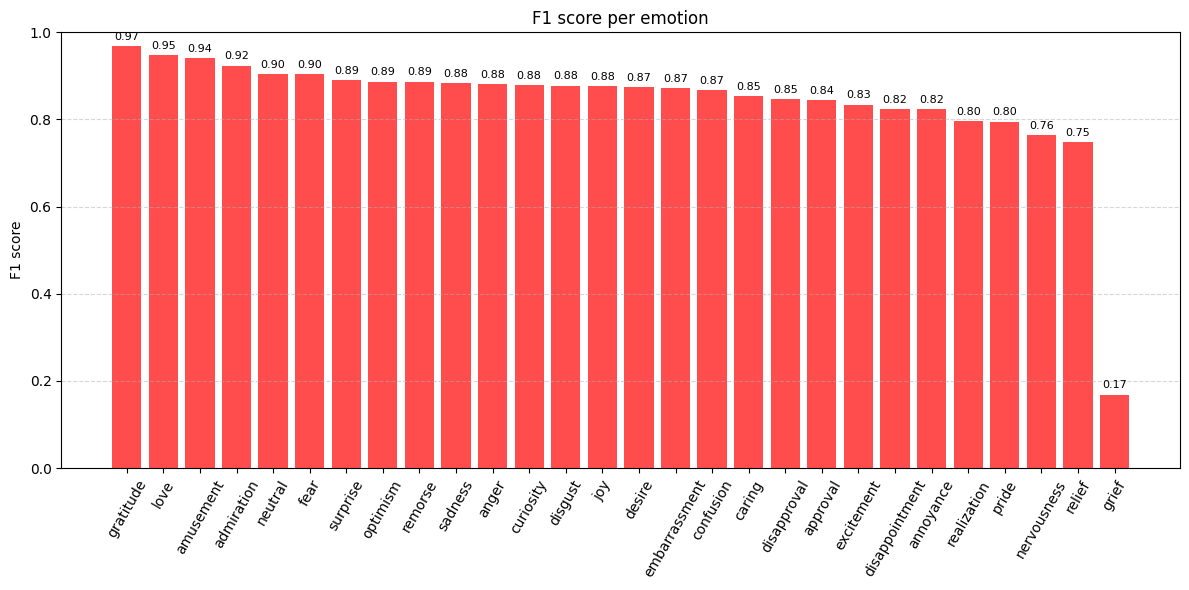

In [26]:
sorted_f1 = df_metrics.sort_values(by='f1', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_f1['label'], sorted_f1['f1'], color='red', alpha=0.7)

plt.xticks(rotation=60, ha='center')
plt.ylabel("F1 score")
plt.title("F1 score per emotion")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

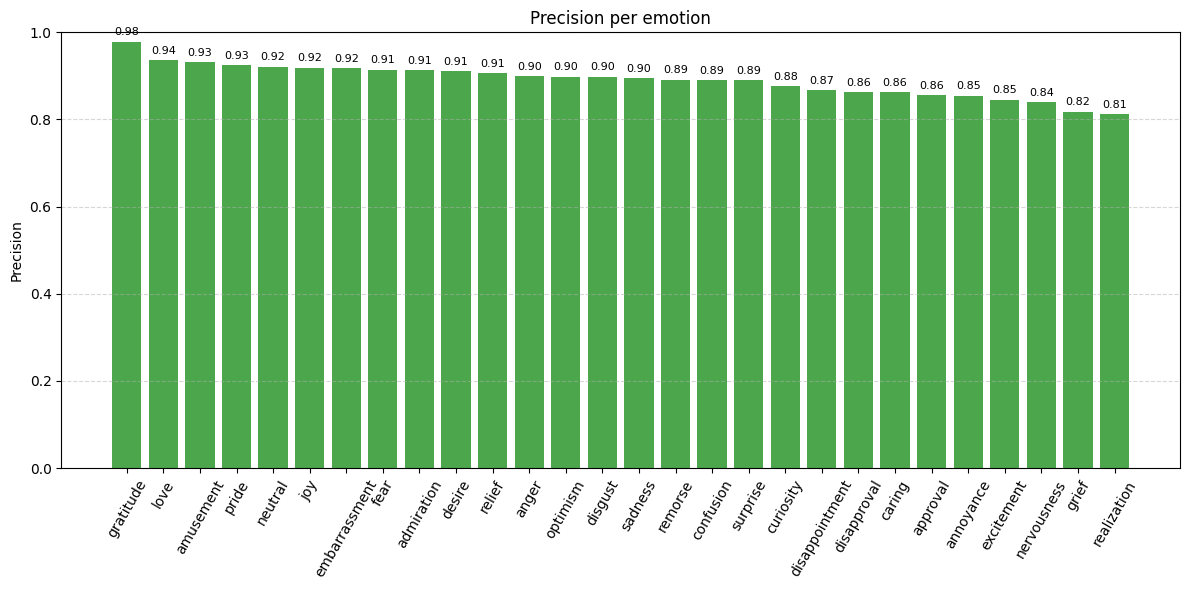

In [27]:
sorted_precision = df_metrics.sort_values(by='precision', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_precision['label'], sorted_precision['precision'], color='green', alpha=0.7)

plt.xticks(rotation=60, ha='center')
plt.ylabel("Precision")
plt.title("Precision per emotion")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

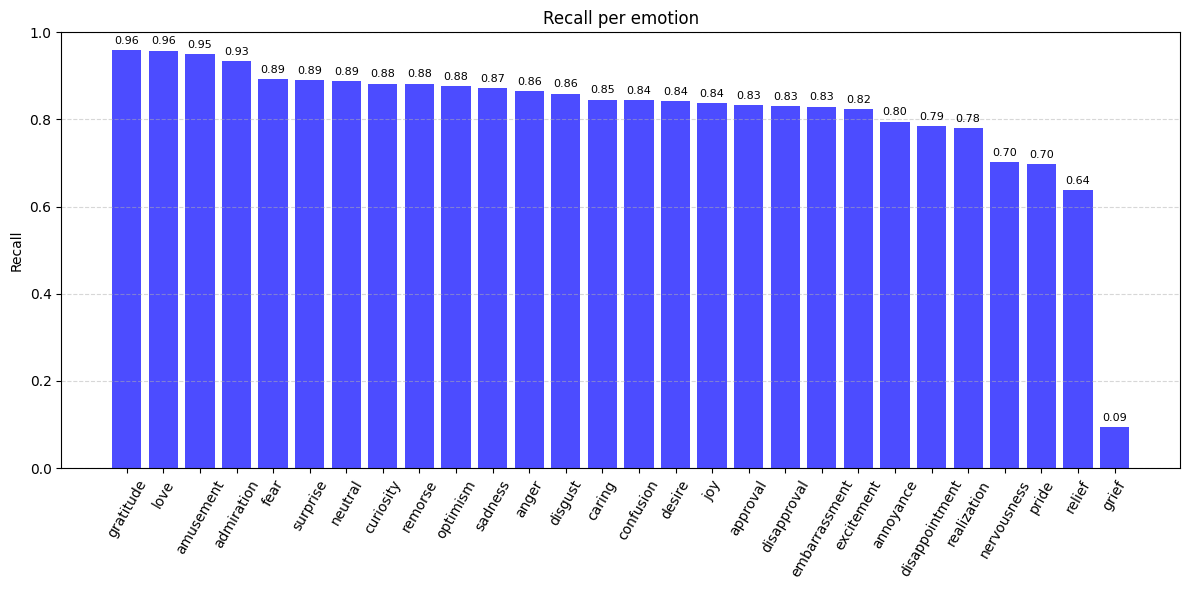

In [28]:
sorted_recall = df_metrics.sort_values(by='recall', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_recall['label'], sorted_recall['recall'], color='blue', alpha=0.7)

plt.xticks(rotation=60, ha='center')
plt.ylabel("Recall")
plt.title("Recall per emotion")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

           Emotion  Support
0          neutral    17772
1       admiration     5122
2         approval     3687
3        gratitude     3372
4        annoyance     3093
5        amusement     2895
6        curiosity     2723
7      disapproval     2581
8             love     2576
9         optimism     1976
10           anger     1960
11             joy     1785
12       confusion     1673
13         sadness     1625
14  disappointment     1583
15     realization     1382
16          caring     1375
17        surprise     1330
18      excitement     1052
19         disgust     1013
20          desire      801
21            fear      764
22         remorse      669
23   embarrassment      375
24     nervousness      208
25          relief      182
26           pride      142
27           grief       96


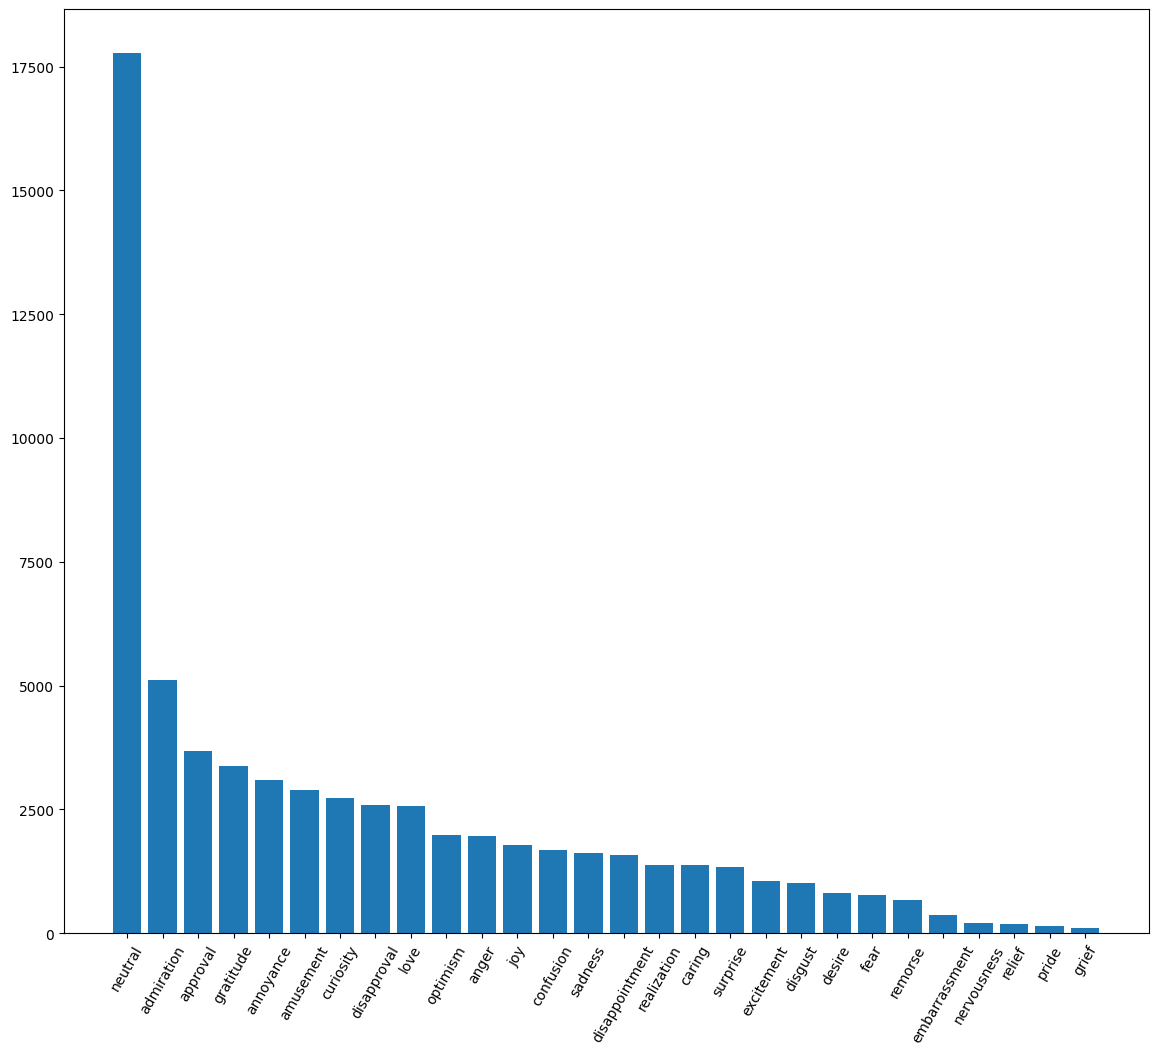

In [42]:
# support
samples_per_class = np.sum(y_true, axis=0)

df_support = pd.DataFrame({
    "Emotion": labels,
    "Support": samples_per_class
})

support_per_class = df_support.sort_values(by='Support', ascending=False).reset_index(drop=True)
print(support_per_class)

plt.figure(figsize=(14, 12))
plt.bar(support_per_class['Emotion'], support_per_class['Support'])
plt.xticks(rotation=60, ha='center')
plt.show()

/tmp/ipykernel_1942/1565270786.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['label'], rotation=60, ha='center')


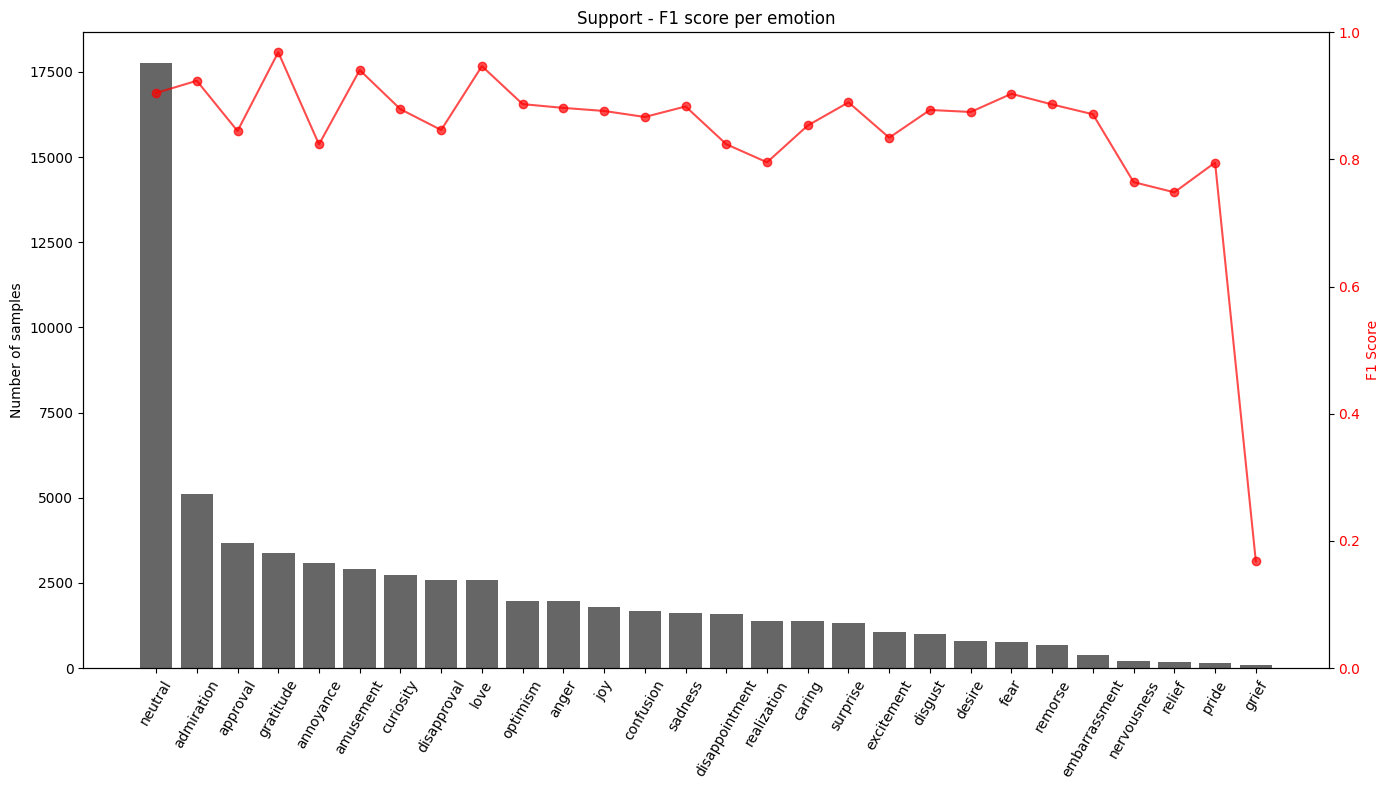

In [48]:
df = df_metrics.sort_values(by='support', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))

color_support = 'black'
ax1.bar(df['label'], df['support'], color=color_support, label='Support (test)', alpha=0.6)
ax1.set_ylabel('Number of samples', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(df['label'], rotation=60, ha='center')

ax2 = ax1.twinx()
ax2.plot(df['label'], df['f1'], color='red', marker='o', label='F1 Score', alpha=0.7)
ax2.set_ylabel('F1 Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1)

plt.title("Support - F1 score per emotion")
fig.tight_layout()
plt.show()

/tmp/ipykernel_1942/28799819.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['label'], rotation=60, ha='center')


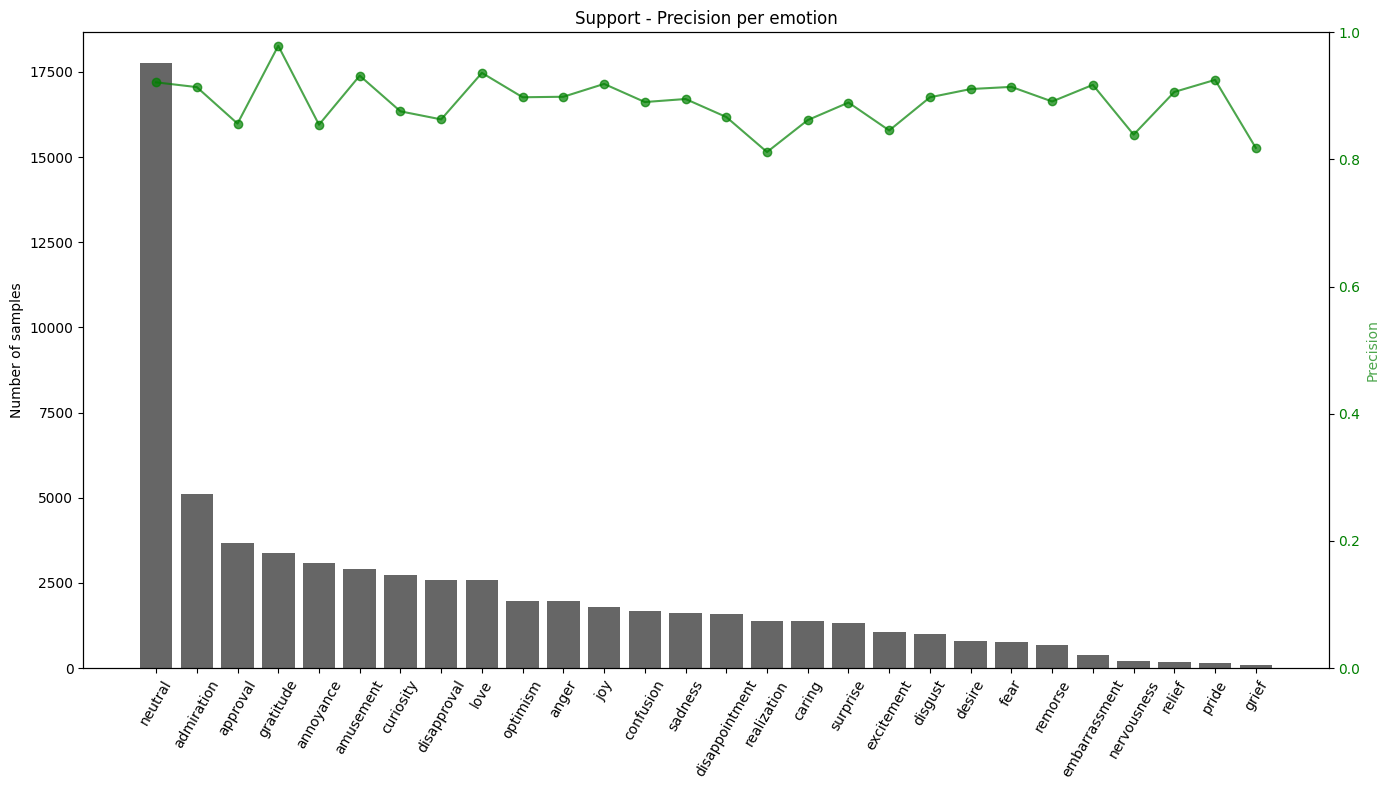

In [47]:
fig, ax1 = plt.subplots(figsize=(14, 8))

color_support = 'black'
ax1.bar(df['label'], df['support'], color=color_support, label='Support (test)', alpha=0.6)
ax1.set_ylabel('Number of samples', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(df['label'], rotation=60, ha='center')

ax2 = ax1.twinx()
ax2.plot(df['label'], df['precision'], color='green', marker='o', label='Precision', alpha=0.7)
ax2.set_ylabel('Precision', color='green', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 1)

plt.title("Support - Precision per emotion")
fig.tight_layout()
plt.show()

/tmp/ipykernel_1942/2518018146.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['label'], rotation=60, ha='center')


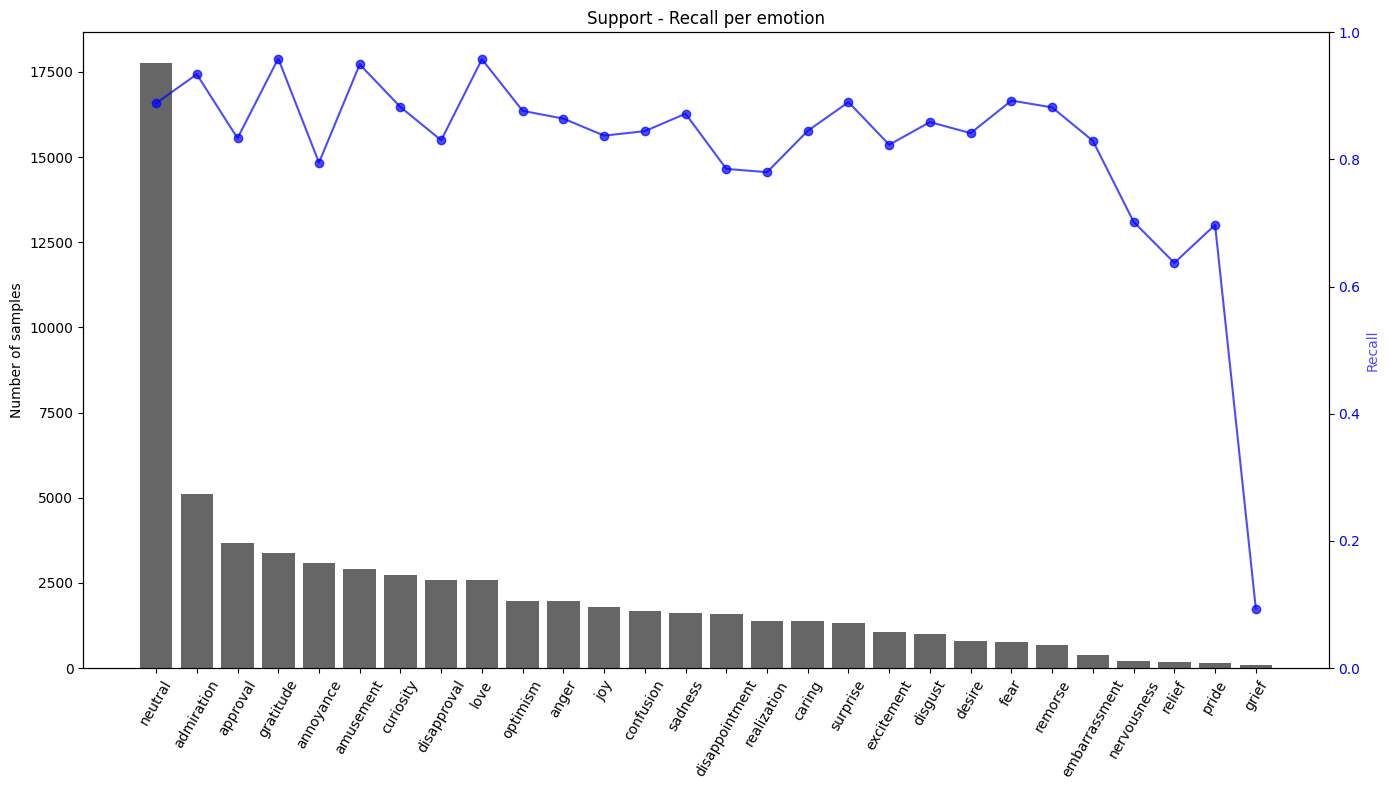

In [49]:
fig, ax1 = plt.subplots(figsize=(14, 8))

color_support = 'black'
ax1.bar(df['label'], df['support'], color=color_support, label='Support (test)', alpha=0.6)
ax1.set_ylabel('Number of samples', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(df['label'], rotation=60, ha='center')

ax2 = ax1.twinx()
ax2.plot(df['label'], df['recall'], color='blue', marker='o', label='Recall', alpha=0.7)
ax2.set_ylabel('Recall', color='blue', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0, 1)

plt.title("Support - Recall per emotion")
fig.tight_layout()
plt.show()

In [50]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [51]:
print(model.classifier)
print(model.classifier.weight.shape)

Linear(in_features=768, out_features=28, bias=True)
torch.Size([28, 768])


### Compare multiple texts [toDo]

In [ ]:
def compare_multiple_emotions(model, X_test, all_probs, indices):

    n = len(indices)
    fig, axs = plt.subplots(1, n, figsize=(5*n, 5))

    for ax, idx in zip(axs, indices):
        text = X_test.iloc[idx]['text']
        probs = all_probs[idx]
        sorted_indices = np.argsort(probs)[::-1][:10]
        labels = [model.config.id2label[i] for i in sorted_indices]
        values = [probs[i] for i in sorted_indices]

        ax.barh(labels[::-1], values[::-1])
        ax.set_xlim(0, 1)
        ax.set_title(f"Top 10 predicted emotions - \"{text}\"", fontsize=10)
        ax.tick_params(labelsize=8)

    plt.tight_layout()
    plt.show()

### New examples

In [52]:
def predict_emotions(text, model, tokenizer, top_k=5):
    # tokenization
    inputs = tokenizer(text, 
                       return_tensors='pt',
                       truncation=True,
                       padding=True).to(device)
    
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1).squeeze()

    # get top k emotions
    top_indices = torch.topk(probs, k=top_k).indices.tolist()
    top_labels = [model.config.id2label[i] for i in top_indices]
    top_probs = [probs[i].item() for i in top_indices]

    plt.figure(figsize=(8, 4))
    bars = plt.barh(top_labels[::-1], top_probs[::-1], color='orange', alpha=0.7)
    plt.xlabel("Probability")
    plt.title("Top Emotions Predicted")
    plt.xlim(0, 1)

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
                 f"{width:.4f}", va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

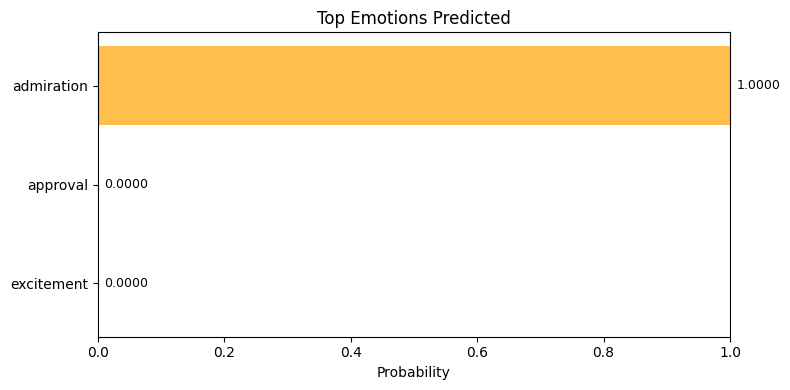

In [54]:
# admiration
predict_emotions("Your dedication to the project is truly inspiring.", model, tokenizer, 3)

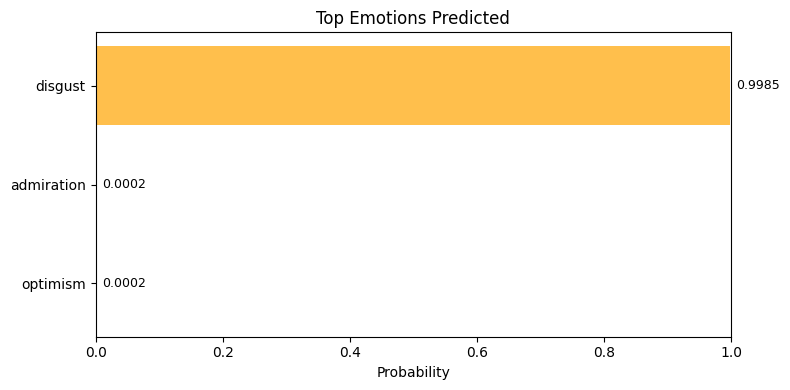

In [55]:
# disgust
predict_emotions("He sneezed into his food and just kept eating. Absolutely disgusting.", model, tokenizer, 3)

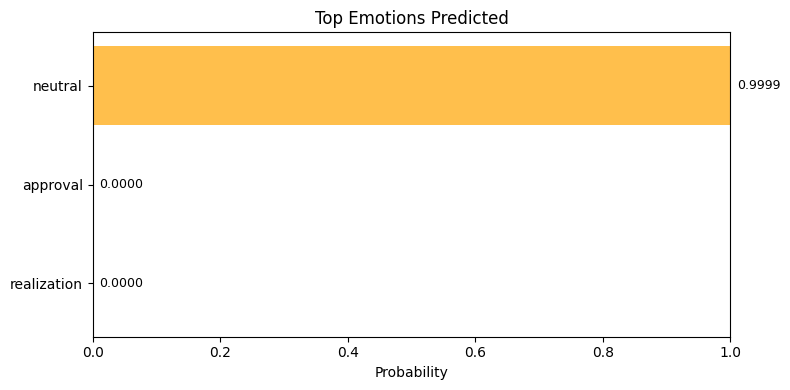

In [56]:
# neutral
predict_emotions("The meeting is scheduled for 3 PM.", model, tokenizer, 3)

Try on label with few examples:
+ pride
+ grief
+ relief
+ nervousness

Examples generated with ChatGPT

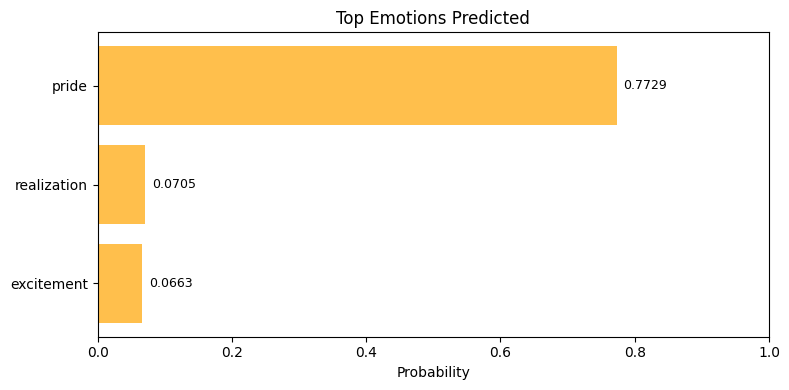

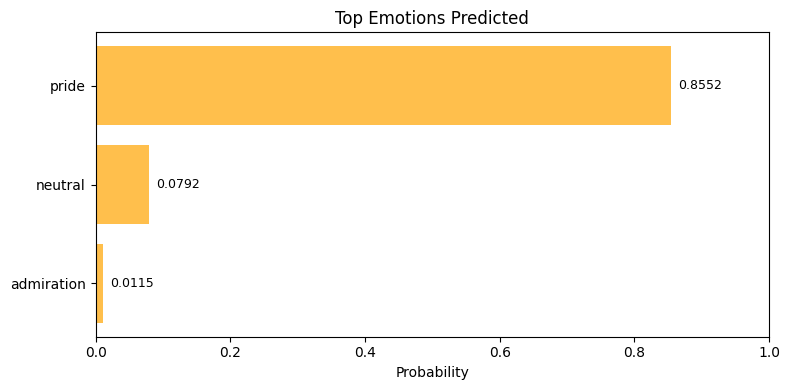

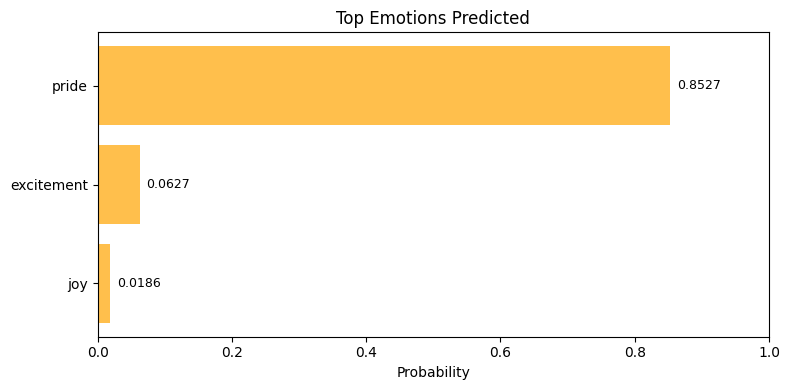

In [57]:
# pride
pride = [
    "Just landed my first job after months of grinding. Honestly, I’ve never felt prouder.",
    "Fixed the leaky sink all by myself—no plumber, no YouTube tutorial, just me. Kinda proud ngl.",
    "Taught my little brother how to ride a bike today. He was scared at first, but now he’s flying. Big bro moment of pride."
]

for t in pride:
    predict_emotions(t, model, tokenizer, 3)

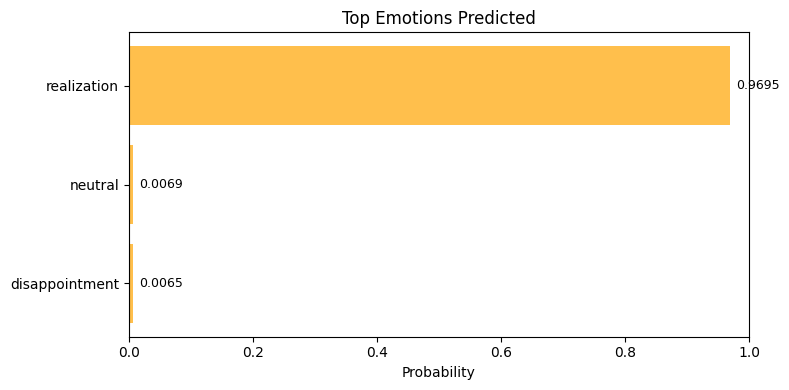

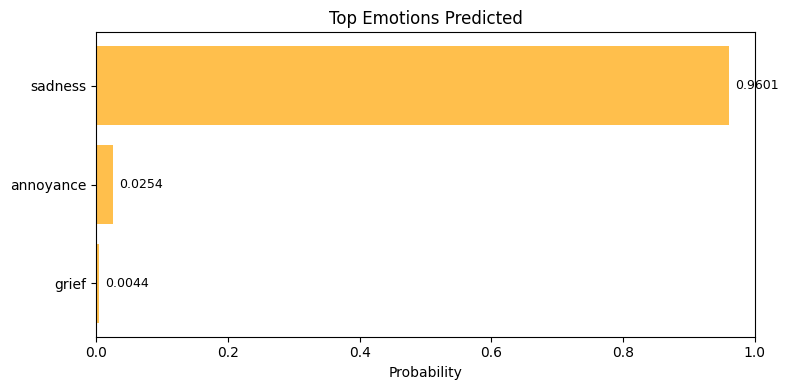

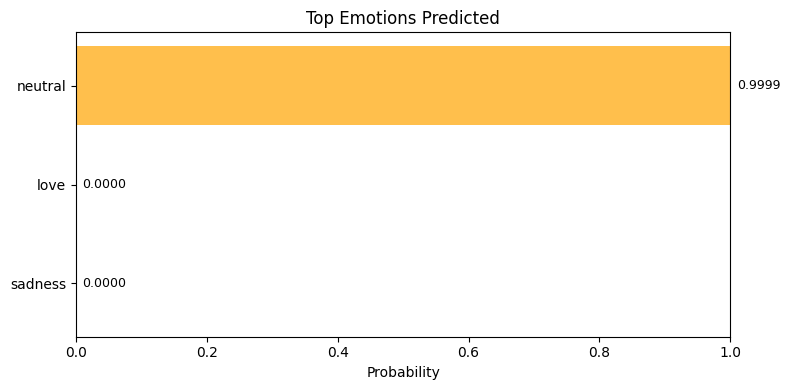

In [58]:
# grief
grief = [
    "my phone lights up and for a split second i think it's her—then it hits me all over again.",
    "laid my dad to rest yesterday; the silence in the house is unbearable.",
    "boxed up his favorite games today and every click of the tape felt like saying goodbye twice."
]

for t in grief:
    predict_emotions(t, model, tokenizer, 3)

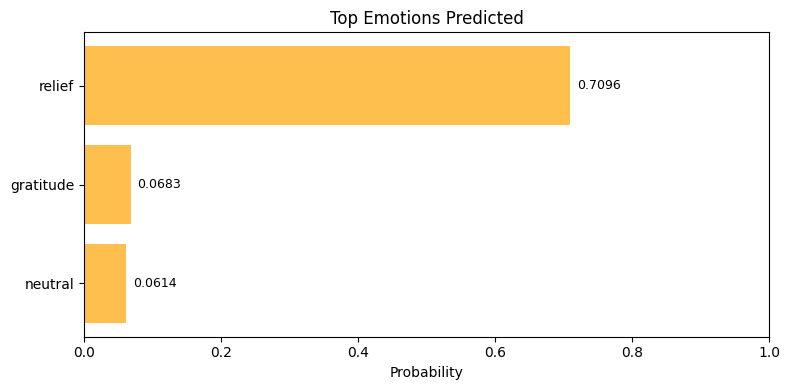

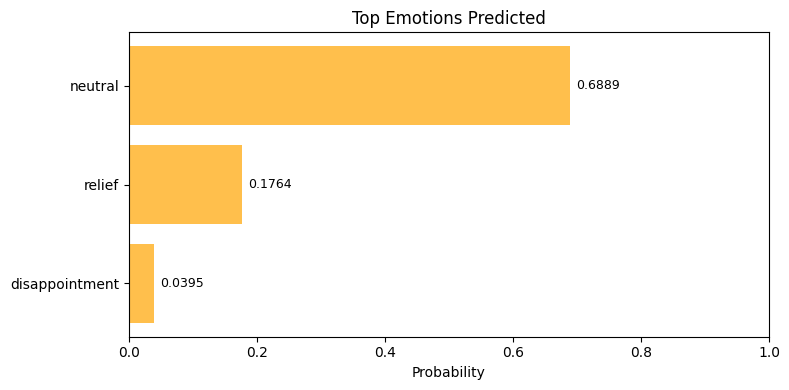

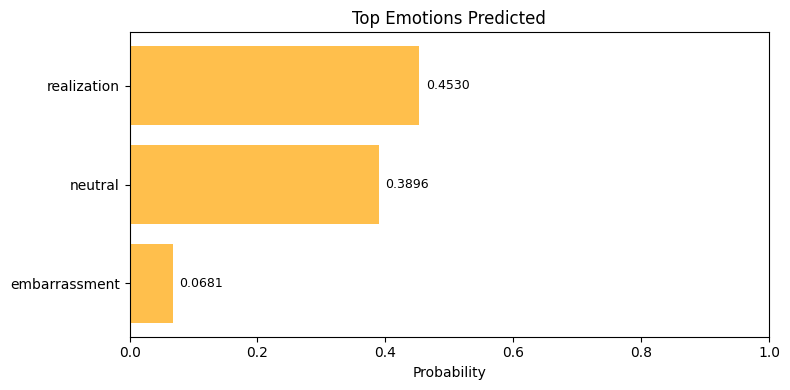

In [59]:
# relief
relief = [
    "phew, that's finally over and done with.",
    "test came back negative—i can breathe again!",
    "thought i lost my wallet but it was just under the car seat."
]

for t in relief:
    predict_emotions(t, model, tokenizer, 3)

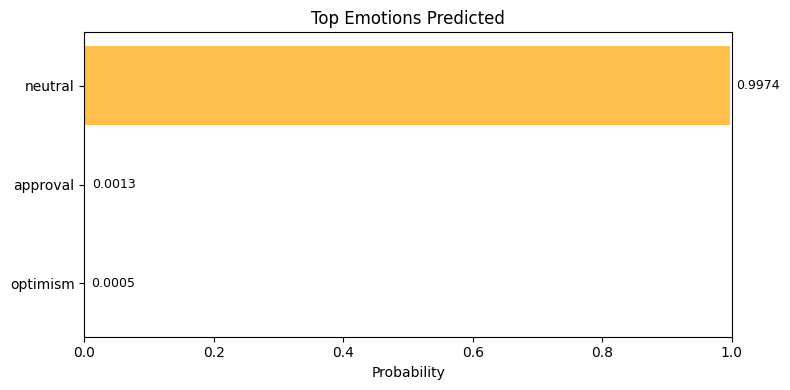

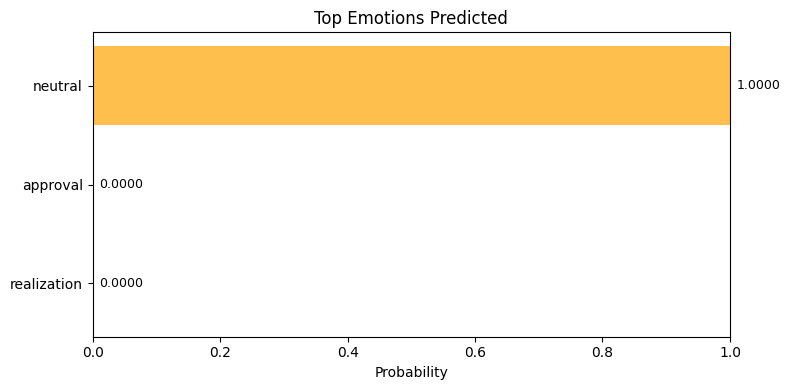

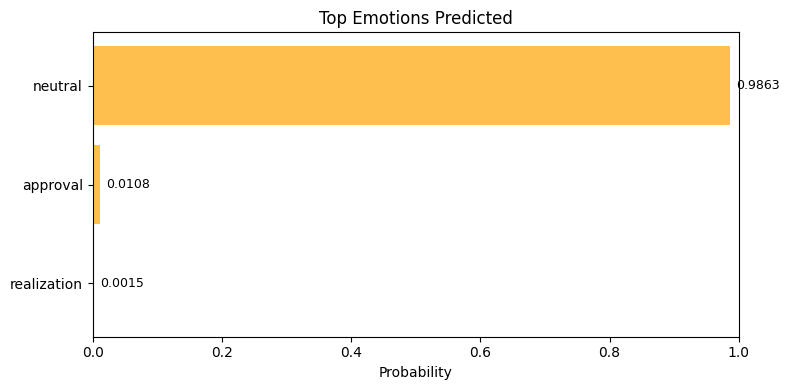

In [60]:
# nervousness
nervousness = [
    "Got a big presentation in the morning and I keep rewriting my intro. My stomach’s in knots.",
    "Meeting her parents tonight for the first time. I’ve changed outfits like five times already.",
    "Just sent in my application for the scholarship. Now the waiting begins... fingers crossed."
]

for t in nervousness:
    predict_emotions(t, model, tokenizer, 3)

### True label - Predicted label

In [ ]:
n = 10 

for i in range(n):
    text = 